# Lecture 4: Conditional Probabilities

## Learning Objectives

By the end of this lecture, you should be able to:

- Calculate conditional distributions when given a full distribution.
- Obtain the marginal mean from conditional means and marginal probabilities, using the Law of Total Expectation.
- Use the Law of Total Probability to convert between conditional, marginal distributions, and joint distributions.
- Compare and contrast independence versus conditional independence.

(discrete-univariate-conditional-distributions)=
## 1. Univariate Conditional Distributions

Let us start with the following inquiry:

> Probability distributions describe an uncertain outcome, but what if we have partial information?

``` {figure} img/ship.png
:height: 350px
:name: ship
A cargo ship
```

Consider the example of ships arriving at the port of Vancouver again. Each ship will stay at port for a random number of days, which we will call the **length of stay** ($\text{LOS}$). For the sake of our notation, let us call it $L$, which has the following distribution:

In [1]:
library(tidyverse)
library(knitr)
library(kableExtra)
library(IRdisplay)

── Attaching core tidyverse packages ─────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows




In [2]:
los <- tribble(
  ~ndays, ~p,
  1, 0.25,
  2, 0.35,
  3, 0.2,
  4, 0.1,
  5, 0.1
)

kable(los,
  col.names = c("L (Days)", "Probability"),
  align = "cc", format = "html") %>%
  as.character() %>%
  display_html()

L (Days),Probability
1,0.25
2,0.35
3,0.20
4,0.10
5,0.10


We can also plot this probability mass function (PMF) as a bar chart:

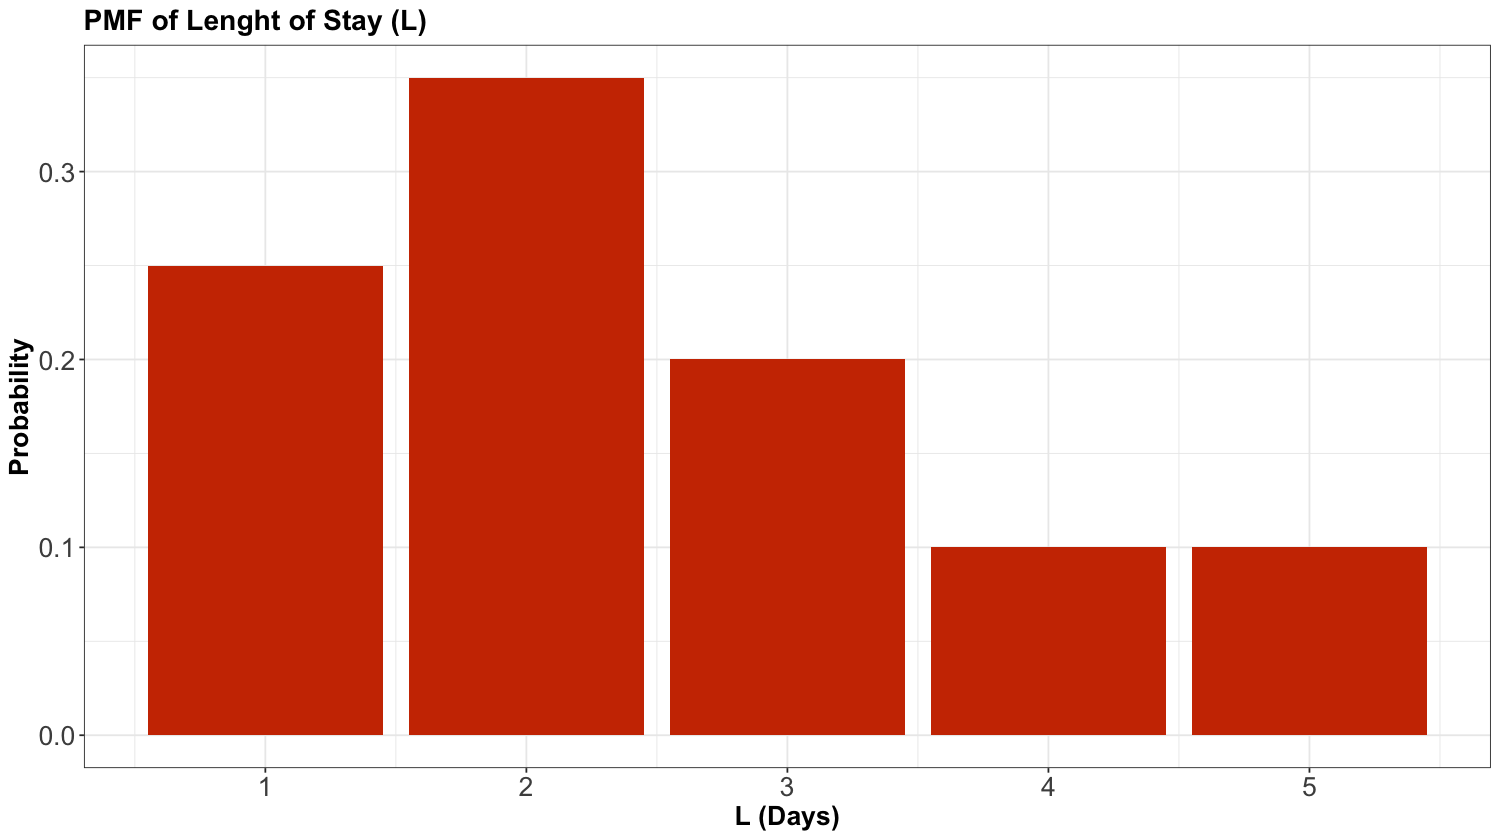

In [3]:
options(repr.plot.width = 12.5)

ggplot(los, aes(ndays, p)) +
  geom_col(fill = "orangered3") +
  labs(
    x = "L (Days)",
    y = "Probability"
  ) +
  theme_bw() +
  theme(plot.title = element_text(size = 17, face = "bold"),
    axis.text = element_text(size = 16),
    axis.title = element_text(size = 16, face = "bold")) +
  ggtitle("PMF of Lenght of Stay (L)")

Before continuing with our example, let us formally define conditional probability.

````{admonition} Definition of Conditional Probability
:class: tip
Let $A$ and $B$ be two events of interest within the sample $S$, and $P(B) > 0$, then the **conditional probability** of $A$ given $B$ is defined as:

```{math}
:label: conditional-probability
P(A \mid B) = \frac{P(A \cap B)}{P(B)}.
```

What is going on here? Basically, event $B$ is becoming the new sample space; note that $P(B \mid B) = 1$. The tweak here is that our original sample space $S$ has been updated to $B$. 
````

```{admonition} Definition of Conditional Probability Distribution
:class: tip
Let $A$ and $B$ be two events of interest within the sample $S$. A conditional probability distribution of event $A$ given $B$ is a **proper probability distribution** for event $A$ after observing event $B$. This distribution is restricted to the subsample space provided by event $B$.
```

Now, suppose a ship has been at port for 2 days now, and it will be staying longer. **This means that we know the $L$ will be greater than 2.** Now we might wonder, what is the distribution of the $L$ now? Using symbols, this is written as

$$P(L = l \mid L > 2),$$

where the bar "$\mid$" reads as "given" or "conditional on" the event $L > 2$. One of these probabilities, like $P(L = 3 \mid L > 2)$, is called a **conditional probability**, and the whole distribution, $P(L = l \mid L > 2)$ for all $l$, is called a **conditional probability distribution**. 

It is essential to stop here for a moment and recognize that this is, in fact, a probability distribution, i.e.,

```{math}
:label: ships-conditional
\displaystyle \sum_{l = 3}^5 P(L = l \mid L > 2) = 1.
```

Why is ? Well, the ship has been here for two days, and something still has to happen. So just like $P(L = l)$ was a probability distribution with probabilities summing to 1, $P(L = l \mid L > 2)$ is also a probability distribution with probabilities summing to 1. **But the probabilities will be different because they have to be updated given the information that $L > 2$.**

```{important} 
Note that, in Equation {eq}`ships-conditional`, we restrict the values of $l$ from $3$ to $5$ given the condition $L > 2$.
```

**In the case of a discrete random variable**, we can calculate a conditional distribution in two ways:

1. A **table approach** and 
2. a **formula approach**.

### 1.1. Table Approach

Let us start with the table approach for our cargo ship example via the following steps:

1. Subset the PMF table to only those outcomes that satisfy the **condition** ($L > 2$ in this case). You will end up with a sub-table.
2. Re-normalize the remaining probabilities so that they add up to 1. You will end up with the conditional distribution under that condition.

Recall our original PMF is the following:

In [4]:
kable(los,
  col.names = c("L (Days)", "Probability"),
  align = "cc", format = "html") %>%
  as.character() %>%
  display_html()

L (Days),Probability
1,0.25
2,0.35
3,0.20
4,0.10
5,0.10


Nevertheless, now that we know $L > 2$, we have to "delete" some of these options:

```{list-table} First step to update of the probability mass function (PMF) of random variable $L$ given condition $L > 2$ 
:header-rows: 1
:name: step-1-conditional-pmf-L

* - $L$ (Days)
  - $P(L = l \mid L > 2)$
* - 1
  - IMPOSSIBLE
* - 2
  - IMPOSSIBLE
* - 3
  - Used to be 0.20
* - 4
  - Used to be 0.10
* - 5
  - Used to be 0.10
```

Since the only possible outcomes now are $L = 3, 4, 5$, we **scale** (or **re-normalize**) these remaining probabilities up to bigger values so that they all add up to 1 again. In this case, 

$$0.20 + 0.10 + 0.10 = 0.40,$$ 

so if we divide all the probabilities by $0.40$ in {numref}`step-1-conditional-pmf-L`, except for $L = 1, 2$ whose probabilities are now 0, we will be good to go:


```{list-table} Conditional probability mass function (PMF) of random variable $L$ given condition $L > 2$ 
:header-rows: 1
:name: conditional-pmf-L

* - $L$ (Days)
  - $P(L = l \mid L > 2)$
* - 1
  - 0
* - 2
  - 0
* - 3
  - 0.50
* - 4
  - 0.25
* - 5
  - 0.25
```

Note how, for outcomes satisfying the condition $L > 2$, the **ratios** of the probabilities stay the same: $L = 3$ used to be twice as likely as $L = 4$, and that is still the case after conditioning.

### 1.2. Formula Approach

Now, let us proceed with the formula approach via Equation {eq}`conditional-probability`. For our example, the event $A$ is $L = l$ and the event $B$ is $L > 2$. Plugging this in, we get 

$$P(L = l \mid L > 2) = \frac{P(L = l \cap L > 2)}{P(L > 2)} = \frac{P(L = l)}{P(L > 2)} \quad \text{for} \quad l = 3, 4, 5.$$

The only real "trick" is the numerator. How did we reduce the convoluted event 

$$L = l \cap L > 2$$ 

to the simple event $L = l$ for $l = 3, 4, 5$? The "trick" is to go through all outcomes and check which ones satisfy the requirement 

$$L = l \cap L > 2.$$ 

This reduces to $L = l$, as long as $l = 3, 4, 5$.

Looking at the cargo ship example via the formula, we can see that the math is telling us to do the "re-normalizing" we did above: for all cases satisfying the condition, we would divide by 

```{math}
\begin{align*}
P(L > 2) &= P(L = 3) + P(L = 4) + P(L = 5) \\
&= 0.20 + 0.10 + 0.10 \\
&= 0.40.
\end{align*}
```

which is exactly what we did when we re-normalized. Thus:

```{math}
\begin{align*}
P(L = 3 \mid L > 2) &= \frac{P(L = 3 \cap L > 2)}{P(L > 2)} \\
&= \frac{P(L = 3)}{P(L > 2)} \\
&= \frac{0.20}{0.40} \\
&= 0.50.
\end{align*}
```

```{math}
\begin{align*}
P(L = 4 \mid L > 2) &= \frac{P(L = 4 \cap L > 2)}{P(L > 2)} \\
&= \frac{P(L = 4)}{P(L > 2)} \\
&= \frac{0.10}{0.40} \\
&= 0.25.
\end{align*}
```

```{math}
\begin{align*}
P(L = 5 \mid L > 2) &= \frac{P(L = 5 \cap L > 2)}{P(L > 2)} \\
&= \frac{P(L = 5)}{P(L > 2)} \\
&= \frac{0.10}{0.40} \\
&= 0.25.
\end{align*}
```

So, the two approaches are equivalent, but the first one is easier to remember and a lot more intuitive. 

```{admonition} Note
:class: warning
Even though the table approach is more intuitive, it is necessary to get familiar with the conditional probability as a formula depicted in Equation {eq}`conditional-probability` for *DSCI 553*.
```

(discrete-multivariate-conditional-distributions)=
## 2. Multivariate Conditional Distributions

So far, we have considered conditioning in the one-variable (i.e., univariate) case. 

In our cargo ship examples, if we look at 

```{math}
:label: conditional-probability-ship
P(L = l \mid L > 2),
```
we encounter the same random variable $L$ on both sides of the vertical bar $\mid$ in Equation {eq}`conditional-probability-ship`. This is often useful. However, it is more useful to think about the distribution of one random variable **when conditioned on a different random variable**. 

To dig into that case, let us revisit our 2-variable example from {doc}`03_lecture-joint` where we looked at both the $\text{LOS}$ (i.e., random variable $L$) and the number of $\text{Gangs}$ required (i.e., random variable $G$) via our joint distribution:

In [5]:
raw_data <- data.frame(
  LOS = c(rep(1, 4), rep(2, 4), rep(3, 4), rep(4, 4), rep(5, 4)), Gangs = rep(1:4, 5),
  Probability = c(
    0.00170, 0.04253, 0.12471, 0.08106,
    0.02664, 0.16981, 0.13598, 0.01757,
    0.05109, 0.11563, 0.03203, 0.00125,
    0.04653, 0.04744, 0.00593, 0.00010,
    0.07404, 0.02459, 0.00135, 0.00002
  )
)

joint_distribution <- raw_data %>%
  mutate(
    LOS = str_c("L = ", LOS),
    Gangs = str_c("G = ", Gangs)
  ) %>%
  pivot_wider(id_cols = LOS, names_from = Gangs, values_from = Probability) %>%
  column_to_rownames("LOS") %>%
  as.matrix()
round(joint_distribution, 4)

,G = 1,G = 2,G = 3,G = 4
L = 1,0.0017,0.0425,0.1247,0.0811
L = 2,0.0266,0.1698,0.1360,0.0176
L = 3,0.0511,0.1156,0.0320,0.0013
L = 4,0.0465,0.0474,0.0059,0.0001
L = 5,0.0740,0.0246,0.0014,0.0000


Thus, suppose a ship is arriving, and they have told you they will only be staying for **exactly** 1 day. What is the distribution of $G$ under this information? That is, what is $P(G = g \mid L = 1)$ for all possible $g$? We will check out the table and formula approaches once again.

### 2.1. Table Approach

Let us start with the table approach:

1. We are supposed to throw away all the cases where the condition is not satisfied. Isolating the outcomes satisfying the condition ($L = 1$) in the joint distribution, we obtain the first row:

In [6]:
joint_distribution_cond <- joint_distribution
joint_distribution_cond[1,] <- paste("Used to be", round(joint_distribution_cond[1,], digits = 4))
joint_distribution_cond[2:5,] <- "IMPOSSIBLE"
joint_distribution_cond

,G = 1,G = 2,G = 3,G = 4
L = 1,Used to be 0.0017,Used to be 0.0425,Used to be 0.1247,Used to be 0.0811
L = 2,IMPOSSIBLE,IMPOSSIBLE,IMPOSSIBLE,IMPOSSIBLE
L = 3,IMPOSSIBLE,IMPOSSIBLE,IMPOSSIBLE,IMPOSSIBLE
L = 4,IMPOSSIBLE,IMPOSSIBLE,IMPOSSIBLE,IMPOSSIBLE
L = 5,IMPOSSIBLE,IMPOSSIBLE,IMPOSSIBLE,IMPOSSIBLE


2. Now, re-normalize the probabilities so that they add up to 1, by dividing them by their sum, which is 

$$0.0017 + 0.0425 + 0.1247 + 0.0811 = 0.25.$$

In [7]:
joint_distribution_cond_los <- (round(joint_distribution[1, , drop = FALSE] / sum(joint_distribution[1, ]), 4))
joint_distribution_cond_los

,G = 1,G = 2,G = 3,G = 4
L = 1,0.0068,0.1701,0.4988,0.3242


And this is it, we have $P(G = g \mid L = 1)$. By the way, compare this with **the marginal distribution of the number of $\text{Gangs}$**: 

In [8]:
G_marginal <- matrix(c(0.2, 0.4, 0.3, 0.1), nrow = 1, ncol = 4) %>% 
kable(format = "html", digits = 4, col.names = str_c("G = ", 1:4), row.names = FALSE) %>%
  as.character()
G_marginal %>% display_html()

G = 1,G = 2,G = 3,G = 4
0.2,0.4,0.3,0.1


Or, preferably, here is the same comparison in plot format:

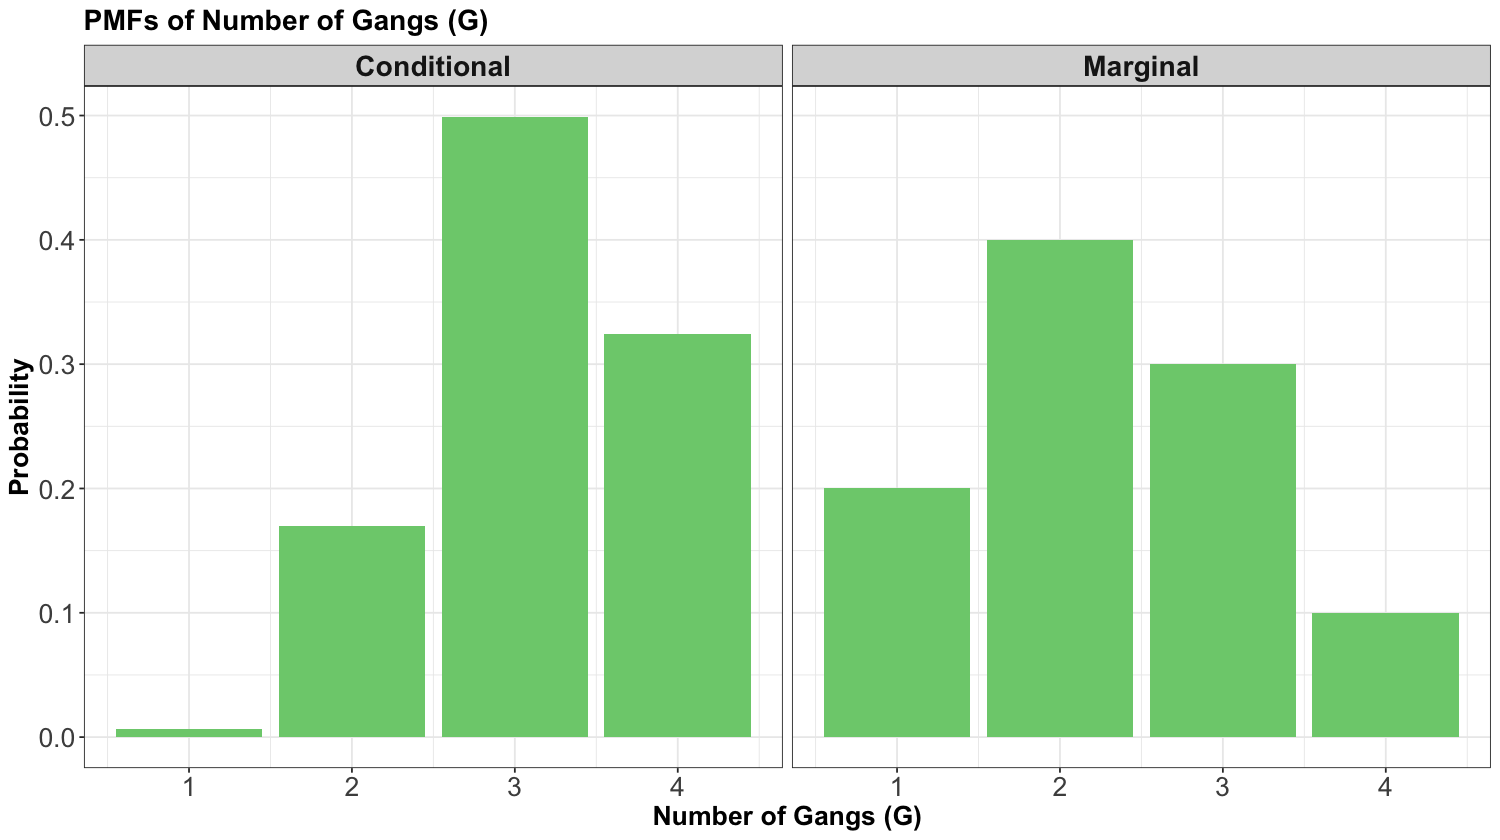

In [9]:
melted_joint_distribution <- data.frame(
  LOS = c(rep(1, 4), rep(2, 4), rep(3, 4), rep(4, 4), rep(5, 4)), Gangs = rep(1:4, 5),
  p = c(
    0.00170, 0.04253, 0.12471, 0.08106,
    0.02664, 0.16981, 0.13598, 0.01757,
    0.05109, 0.11563, 0.03203, 0.00125,
    0.04653, 0.04744, 0.00593, 0.00010,
    0.07404, 0.02459, 0.00135, 0.00002
  )
)

j_compare <- melted_joint_distribution %>%
  group_by(Gangs) %>%
  summarize(
    Marginal = sum(p),
    Conditional = p[LOS == 1]
  ) %>%
  mutate(Conditional = Conditional / sum(Conditional)) %>%
  pivot_longer(
    cols = c("Marginal", "Conditional"),
    names_to = "type",
    values_to = "p"
  )
ggplot(j_compare, aes(Gangs, p)) +
  facet_wrap(~type) +
  geom_col(fill = "palegreen3") +
  theme_bw() +
  labs(
    x = "Number of Gangs (G)",
    y = "Probability"
  ) +
  theme(plot.title = element_text(size = 17, face = "bold"),
    axis.text = element_text(size = 16),
    axis.title = element_text(size = 16, face = "bold"),
    strip.text.x = element_text(size = 17, face = "bold")) +
  ggtitle("PMFs of Number of Gangs (G)")

In the above plot, we see the effect of conditioning on the $\text{LOS}$ being 1 day (i.e., $L = 1$) on the left-hand side panel. If the $\text{LOS}$ is short, we shift the PMF towards higher numbers of $\text{Gangs}$. This would be good to know in a real shipping context! Furthermore, this result is consistent with our previous knowledge that $\text{LOS}$ and $\text{Gangs}$ are negatively correlated; a smaller $\text{LOS}$ is associated with a larger number of $\text{Gangs}$. 

We can also look at expected values. Firstly, **let us use the respective marginal PMF for $G$:**

In [10]:
colSums(joint_distribution) %>%
  kable(col.names = "Probability", align = "c", format = "html") %>%
  column_spec(1, bold = TRUE) %>%
  as.character() %>%
  display_html()

,Probability
G = 1,0.2
G = 2,0.4
G = 3,0.3
G = 4,0.1


Then, we can obtain the marginal expected number of $\text{Gangs}$:

```{math}
\begin{align*}
\mathbb{E}(G) &= 1(0.2) + 2(0.4) + 3(0.3) + 4(0.1) \\
&= 2.3.
\end{align*}
```

That said, after conditioning on $L = 1$, we can obtain the **conditional expectation** of the number of $\text{Gangs}$. This is exactly the same formula for expected value, but this time using the conditional distribution for $\text{Gangs}$ given $L = 1$:

In [11]:
round(joint_distribution_cond_los, 4)

,G = 1,G = 2,G = 3,G = 4
L = 1,0.0068,0.1701,0.4988,0.3242


We write it as $\mathbb{E}(G \mid L = 1)$. It is computed as follows:

```{math}
\begin{align*}
\mathbb{E}(G \mid L = 1) &= 1(0.0068) + 2(0.1701) + 3(0.4988) + 4(0.3242) \\
&= 3.1406.
\end{align*}
```

We see that indeed the expected number of $\text{Gangs}$ increased once we conditioned on the $\text{LOS}$ being only 1 day.

### 2.2. Formula Approach

Now, let us proceed with the formula approach. By applying the formula for conditional probabilities {eq}`conditional-probability`, we get 

```{math}
:label: ship-formula-approach
P(G = g \mid L = 1) = \frac{P(G = g \cap L = 1)}{P(L = 1)} \quad \text{for} \quad g = 1, 2, 3, 4.
```

Let us check the joint distribution from {doc}`03_lecture-joint`:

In [12]:
round(joint_distribution, 4)

,G = 1,G = 2,G = 3,G = 4
L = 1,0.0017,0.0425,0.1247,0.0811
L = 2,0.0266,0.1698,0.1360,0.0176
L = 3,0.0511,0.1156,0.0320,0.0013
L = 4,0.0465,0.0474,0.0059,0.0001
L = 5,0.0740,0.0246,0.0014,0.0000


Then, we can obtain the denominator from Equation {eq}`ship-formula-approach` as follows:

```{math}
\begin{align*}
P(L = 1) &= P(G = 1 \cap L = 1) + P(G = 2 \cap L = 1) + \\
& \qquad P(G = 3 \cap L = 1) + P(G = 4 \cap L = 1) \\
&= 0.0017 + 0.0425 + 0.1247 +  0.0811 \\ 
&= 0.25.
\end{align*}
```

Finally, using the first row of the joint distribution to obtain the intersections from the numerator, we compute the conditional probabilities:

```{math}
\begin{align*}
P(G = 1 \mid L = 1) &= \frac{P(G = 1 \cap L = 1)}{P(L = 1)} \\
&= \frac{0.0017}{0.25} \\
&= 0.0068.
\end{align*}
```

```{math}
\begin{align*}
P(G = 2 \mid L = 1) &= \frac{P(G = 2 \cap L = 1)}{P(L = 1)} \\
&= \frac{0.0425}{0.25} \\
&= 0.1701.
\end{align*}
```

```{math}
\begin{align*}
P(G = 3 \mid L = 1) &= \frac{P(G = 3 \cap L = 1)}{P(L = 1)} \\
&= \frac{0.1247}{0.25} \\
&= 0.4988.
\end{align*}
```

```{math}
\begin{align*}
P(G = 4 \mid L = 1) &= \frac{P(G = 4 \cap L = 1)}{P(L = 1)} \\
&= \frac{0.0811}{0.25} \\
&= 0.3242.
\end{align*}
```

And the above four conditional probabilities are part of a proper conditional PMF:

```{math}
\begin{align*}
\sum_{g = 1}^4 P(G = g \mid L = 1) &= 0.0068 + 0.1701 + 0.4988 + 0.3242 \\
&= 1.
\end{align*}
```

Again, the table approach and the formula approach are equivalent.

### 2.3. Independence and Conditional Probabilities

In {doc}`03_lecture-joint`, we saw the notion of **independence** of random variables. We said that random variables $X$ and $Y$ are independent if and only if 

$$P(Y = y \cap X = x) = P(Y = y) \cdot P(X = x), \text{ for all } x \text{ and } y.$$ 

With conditional probabilities introduced, we now have a new (and equivalent) definition of independence: 

```{math}
\begin{align*}
P(Y = y \mid X = x) &= \frac{P(Y = y \cap X = x)}{P(X = x)} \\
&= \frac{P(Y = y) \cdot P(X = x)}{P(X = x)} \\
&= P(Y = y),
\end{align*}
```

and likewise, if you switch $Y$ and $X$. Intuitively, this says that knowing $X$ tells you nothing about $Y$, and knowing $Y$ tells you nothing about $X$.

### 2.4. Law of Total Probability/Expectation

Quite often, we know the conditional distributions. Nonetheless, we do not directly have the marginal distributions. In fact, most regression and Machine Learning models are about seeking **conditional means** (note that **conditional mean** and **conditional expectation** are synonyms).


````{admonition} Definition of the Law of Total Expectation
:class: tip
Let $X$ and $Y$ be two random variables. Generally, a marginal mean $\mathbb{E}_Y(Y)$ can be computed from the **conditional means** $\mathbb{E}_Y(Y \mid X = x)$ and the **probabilities of the conditioning variable** $P(X = x)$. 

The formula, known as the **Law of Total Expectation**, is

```{math}
:label: law-total-expectation
\mathbb{E}_Y(Y) = \sum_x \mathbb{E}_Y(Y \mid X = x) \cdot P(X = x).
```

Or, it can also be written as:

```{math}
:label: law-total-expectation-2
\mathbb{E}_Y(Y) = \mathbb{E}_X [\mathbb{E}_Y(Y \mid X)].
```
````

```{important} 
We are omitting the proof of this law since it is out of the scope of the course.
```

In Equations {eq}`law-total-expectation` and {eq}`law-total-expectation-2`, we take care to put subscripts on the expected value operator $\mathbb{E}(\cdot)$ to make clear what random variable we are taking an expectation over. This is often a good idea. **Expectations are sums in the case of discrete random variables** (or, as we will see later, **integrals for continuous random variables**). So, just like how we have the little $x$ in a sum or a $dx$ in an integral, we can use a subscript on the $\mathbb{E}$ to be extra clear.

Also, the previous result in Equation {eq}`law-total-expectation` extends to probabilities:

$$P(Y = y \cap X = x) = P(Y = y \mid X = x) \cdot P(X = x).$$

Now, for the ship case of our random variables $\text{LOS}$ $L$ (the condition) and the number of $\text{Gangs}$ $G$, suppose we have the following **conditional means of gang request $G$ GIVEN the length of stay $L$ of a ship**:

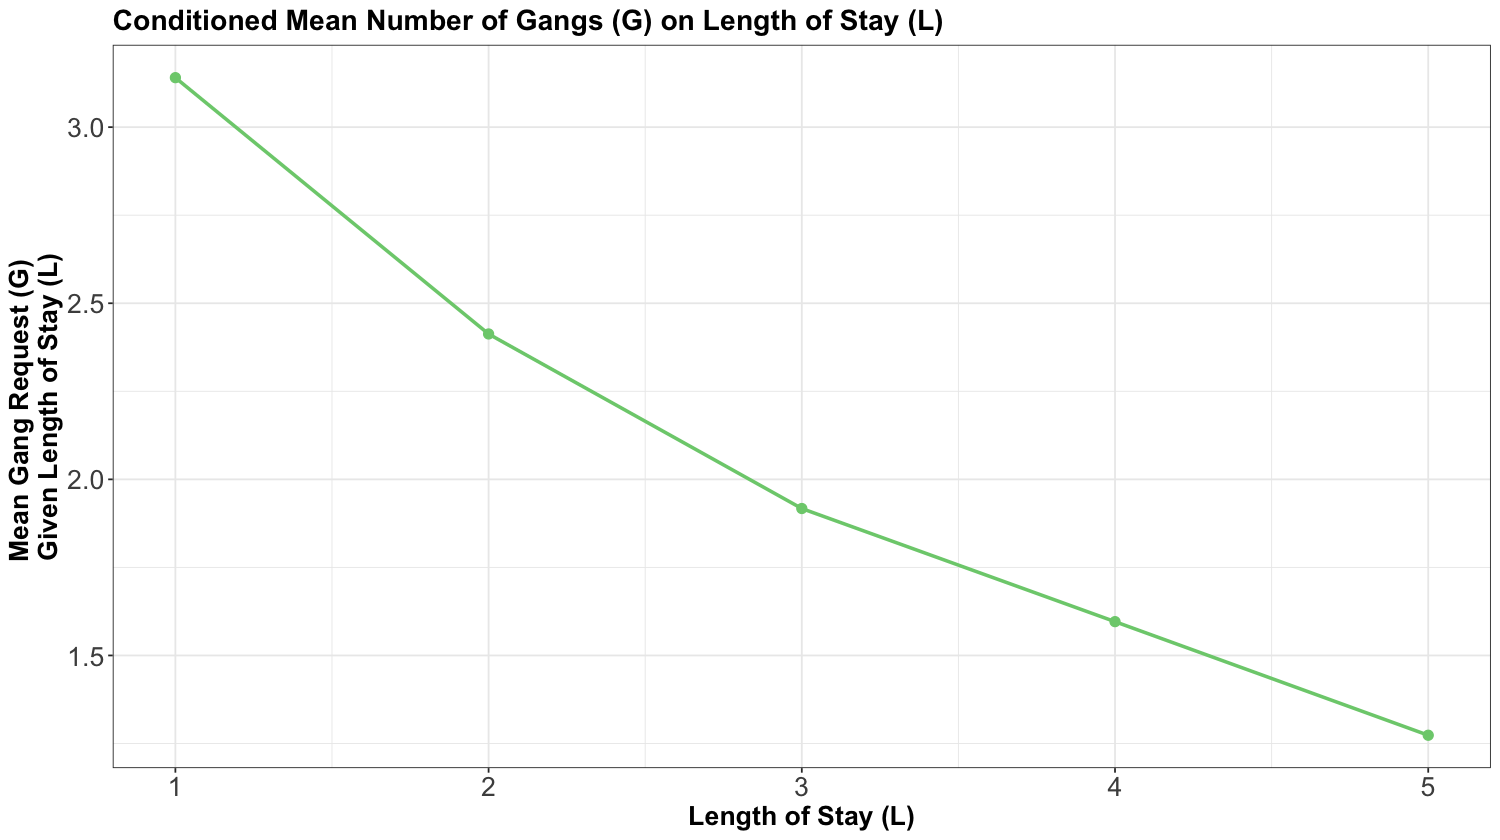

In [13]:
j_cond <- melted_joint_distribution %>%
  group_by(LOS) %>%
  summarize(
    mean = round(sum(Gangs * p) / sum(p), 4),
    p_marg = sum(p)
  )
ggplot(j_cond, aes(LOS, mean)) +
  geom_point(color = "palegreen3", size = 2.5) +
  geom_line(color = "palegreen3", linewidth = 1) +
  labs(x = "Length of Stay (L)",
       y = "Mean Gang Request (G) \nGiven Length of Stay (L)") +
  theme_bw() +
  theme(plot.title = element_text(size = 17, face = "bold"),
    axis.text = element_text(size = 16),
    axis.title = element_text(size = 16, face = "bold"),
    strip.text.x = element_text(size = 17, face = "bold")) +
  ggtitle("Conditioned Mean Number of Gangs (G) on Length of Stay (L)")

This curve is called a **model function** and is helpful if we want to predict a ship's daily gang request if we know their $\text{LOS}$. But what if we want to compute a **marginal expected gang request**? We can use the marginal mean of gang request.

Furthermore, coming from the above plot plus the marginal PMF of $L$, we have the following table with the conditional expectations:

In [14]:
j_cond %>%
  kable(
    col.names = c("l (Days)", "E(G | L = l)", "P(L = l)"),
    align = "ccc",
    format = "html"
  ) %>%
  as.character() %>%
  display_html()

l (Days),E(G | L = l),P(L = l)
1,3.1405,0.25
2,2.4128,0.35
3,1.9172,0.20
4,1.5960,0.10
5,1.2735,0.10


Multiplying the last two columns together, and summing, gives us the marginal expectation; i.e., using Equation {eq}`law-total-expectation`:

$$\mathbb{E}_G(G) = \sum_l \mathbb{E}_G(G \mid L = l) \cdot P(L = l) = 2.3.$$

Now, we will start with in-class questions via [**iClicker**](https://student.iclicker.com/).

```{exercise}
:label: lecture4-q1

Answer **TRUE** or **FALSE**:

In general for two random variables $X$ and $Y$, $P(X = x \mid Y = y)$ is a normalized probability distribution in the sense that

$$\sum_x P(X = x \mid Y = y) = 1.$$

**A.** TRUE

**B.** FALSE
```

```{exercise}
:label: lecture4-q2

Answer **TRUE** or **FALSE**:

In general for two random variables $X$ and $Y$, $P(X = x \mid Y = y)$ is a normalized probability distribution in the sense that

$$\sum_y P(X = x \mid Y = y) = 1.$$

**A.** TRUE

**B.** FALSE
```

```{exercise}
:label: lecture4-q3

Answer **TRUE** or **FALSE**:

Let $X$ be a random variable with non-zero entropy {eq}`entropy-discrete` and $Y$ be a random variable with zero entropy. Then, $X$ and $Y$ are independent.

**A.** TRUE

**B.** FALSE
```

We will solve the below exercise during class (**it is not an iClicker question**):

````{exercise}
:label: lecture4-q4

Given the marginal probabilities of $L$, what is the expected gang request $G$ given that the ship captain says they will not be at port any longer than 2 days? In symbols:

$$\mathbb{E}(G \mid L \leq 2).$$

```{list-table} Probability mass function (PMF) of $\text{LOS}$ $L$
:header-rows: 1
:name: pmf-LOS

* - $L$
  - $P(L = l)$
* - 1
  - 0.25
* - 2
  - 0.35
* - 3
  - 0.2
* - 4
  - 0.1
* - 5
  - 0.1
```

You would also need the below joint distribution between $L$ and $G$.
````

In [15]:
round(joint_distribution, 4)

,G = 1,G = 2,G = 3,G = 4
L = 1,0.0017,0.0425,0.1247,0.0811
L = 2,0.0266,0.1698,0.1360,0.0176
L = 3,0.0511,0.1156,0.0320,0.0013
L = 4,0.0465,0.0474,0.0059,0.0001
L = 5,0.0740,0.0246,0.0014,0.0000


## 3. Conditional Independence

So far, we have discussed the notions of independence and conditional probabilities. We have already discussed conditional distributions such as $P(Y \mid X)$. However, here are a couple of important questions:

> Can the dependence/independence of random variables $X$ and $Y$ change if we condition on another random variable $Z$? 

> If random variables $X$ and $Y$ are independent, are they also independent given random variable $Z$?

The answer is: **not necessarily!** Independence and conditional independence are two different things. Here is our old definition of independence: $X$ and $Y$ are independent if and only if

```{math}
:label: marginal-independence
P(X = x \cap Y = y) = P(X = x) \cdot P(Y = y).
```

Below, we provide the formal definition of **conditional independence**.

````{admonition} Definition of Conditional Independence
:class: tip
Random variables $X$ and $Y$ are conditionally independent given random variable $Z$ if and only if, for any $x$, $y$ and $z$,

```{math}
:label: conditional-independence
P(X = x \cap Y = y \mid Z = z) = P(X = x \mid Z = z) \cdot P(Y = y \mid Z = z).
```

In short, we drop in "$\mid Z = z$" everywhere we can in the original definition of independence.
````

Conditional independence {eq}`conditional-independence` has all the same properties as regular (marginal) independence {eq}`marginal-independence`, but the intuition is quite different. For one thing, we have to consider **three random variables**, not just two. Let us check a further example.

Let $L$ be a student's lab grade in DSCI 551, $Q$ be a student's quiz grade in DSCI 551, and $S$ represents whether the student majored in Statistics in their undergraduate studies. For simplicity, we will consider only [Bernoulli](bernoulli-distribution) random variables, so $L$ and $Q$ will only take on the values "*high*" and "*low*" -- but everything here also applies to random variables with more than two possible outcomes. 

Here is the joint distribution of $L$, $Q$, and $S$:

```{list-table} Joint probability mass function (PMF) of $L$, $Q$ and $S$
:header-rows: 1
:name: pmf-example-conditional

* - $\ell$
  - $q$
  - $s$
  - $P(L = \ell \cap Q = q \cap S = s)$
* - low
  - low
  - yes
  - 0.01
* - low
  - high
  - yes
  - 0.03
* - high
  - low
  - yes
  - 0.03
* - high
  - high
  - yes
  - 0.09
* - low
  - low
  - no
  - 0.21
* - low
  - high
  - no
  - 0.21
* - high
  - low
  - no
  - 0.21
* - high
  - high
  - no
  - 0.21
```

Let us answer the first question:

> Are $L$ and $Q$ independent?

Well, this question has nothing to do with $S$, so let us **marginalize out** $S$. In other words, let us compute the distribution $P(L = \ell \cap Q = q)$ for all values of $\ell$ and $q$. The rules stay the same -- we add up the probabilities associated with the different scenarios. For instance:

```{math}
\begin{align*}
P(L = \text{high} \cap Q = \text{high}) &= P(L = \text{high} \cap Q = \text{high} \cap S = \text{yes}) + \\
& \qquad P(L = \text{high} \cap Q = \text{high} \cap S = \text{no}) \\
&= 0.09 + 0.21 \\
&= 0.30.
\end{align*}
```

Doing this for all four cases yields:

```{list-table} Joint probability mass function (PMF) of $L$ and $Q$
:header-rows: 1
:name: pmf-example-conditional-2

* - $\ell$
  - $q$
  - $P(L = \ell \cap Q = q)$
* - low
  - low
  - 0.22
* - low
  - high
  - 0.24
* - high
  - low
  - 0.24
* - high
  - high
  - 0.30
```

Note the above probabilities still add up to 1.

So, are $L$ and $Q$ independent? **Apparently not.** The marginal probabilities are

$$P(L = \text{high}) = 0.54$$

and 

$$P(Q = \text{high}) = 0.54,$$ 

but 

$$P(L = \text{high} \cap Q = \text{high}) = 0.30 \neq 0.54 \times 0.54.$$ 

Rather, $L$ and $Q$ appear to have a mild positive correlation: *when the lab grade is high, the quiz grade is a bit more likely to be also high*.

Fine, $L$ and $Q$ are not independent. 

> But, what about $L$ and $Q$ given $S$? Are they conditionally independent?

As we will see, yes, they are. But before we get to the math, let us discuss the intuition. As we saw above, when the lab grade is high, the quiz grade is a bit more likely to be also high. Why does this happen? In this example, when the lab grade is more likely to be high, that indicates that maybe this person is a Statistics major (a high-scorer, in other words); if so, that means their quiz grade would also be higher. 

Now, here is the tricky part: because of the way I carefully crafted this joint distribution, the above reasoning is the **only reason** why high lab grades are associated with high quiz grades. **If you already know that a person is (or is not) a Statistics major, then their lab and quiz grades are completely independent.** This is **conditional independence**. 

Like marginal independence, conditional independence is determined entirely by the joint distribution; it is not a property that you can specify separately from the joint. Thus, let us dig into the joint. What we want to know is whether 

$$P(L = \ell \cap Q=q \mid S = s) = P(L = \ell \mid S = s) \cdot P(Q = q \mid S = s).$$ 

We would need the corresponding conditional distributions $P(L = \ell \mid S = s)$ and $P(Q = q \mid S = s)$. Thus, we will check this for both $S = \text{yes}$ and $S = \text{no}$. 

When $S = \text{yes}$, we have:

```{list-table} First step to obtain the joint probability mass function (PMF) of $L$ and $Q$ given $S = \text{yes}$
:header-rows: 1
:name: pmf-example-conditional-3

* - $\ell$
  - $q$
  - $P(L = \ell \cap Q = q \cap S = \text{yes})$
* - low
  - low
  - Used to be $0.01$ in the three-variable PMF
* - low
  - high
  - Used to be $0.03$ in the three-variable PMF
* - high
  - low
  - Used to be $0.03$ in the three-variable PMF
* - high
  - high
  - Used to be $0.09$ in the three-variable PMF
```

Now, using the formula approach for a conditional probability, we need the following to get the corresponding conditional distribution given $S = \text{yes}$:

```{math}
\begin{align*}
P(L = \ell \cap Q = q \mid S = \text{yes}) &= \frac{P(L = \ell \cap Q = q \cap S = \text{yes})}{P(S = \text{yes})} \\ 
\\
& \qquad \qquad \qquad \qquad \text{for} \quad \ell = \text{low}, \text{high} \quad \text{and} \quad q = \text{low}, \text{high}
\end{align*}
```

From the original three-variable PMF in {numref}`pmf-example-conditional`, we know that:

```{math}
\begin{align*}
P(S = \text{yes}) &= P(L = \text{low} \cap Q = \text{low} \cap S = \text{yes}) + P(L = \text{low} \cap Q = \text{high} \cap S = \text{yes}) + \\
& \qquad P(L = \text{high} \cap Q = \text{low} \cap S = \text{yes}) + P(L = \text{high} \cap Q = \text{high} \cap S = \text{yes}) \\
&= 0.01 + 0.03 + 0.03 + 0.09 \\
&= 0.16.
\end{align*}
```

Therefore, re-normalizing yields:

```{list-table} Re-normalized joint probability mass function (PMF) of $L$ and $Q$ given $S = \text{yes}$
:header-rows: 1
:name: pmf-example-conditional-4

* - $\ell$
  - $q$
  - $P(L = \ell \cap Q = q \mid S = \text{yes})$
* - low
  - low
  - $0.01 / 0.16 = 0.0625$ 
* - low
  - high
  - $0.03 / 0.16 = 0.1875$
* - high
  - low
  - $0.03 / 0.16 = 0.1875$
* - high
  - high
  - $0.09 / 0.16 = 0.5625$ 
```

We can check that this conditional distribution on $S = \text{yes}$ satisfies the definition of independence; i.e.,

```{math}
\begin{gather*}
P(L = \text{low} \cap Q = \text{low} \mid S = \text{yes}) = \frac{0.01}{0.16} = 0.0625 \\
P(L = \text{low} \cap Q = \text{high} \mid S = \text{yes}) = \frac{0.03}{0.16} = 0.1875 \\
P(L = \text{high} \cap Q = \text{low} \mid S = \text{yes}) = \frac{0.03}{0.16} = 0.1875 \\
P(L = \text{high} \cap Q = \text{high} \mid S = \text{yes}) = \frac{0.09}{0.16} = 0.5625
\end{gather*}
```

should be the respective products of 

```{math}
\begin{align*}
P(L = \text{low} \mid S = \text{yes}) \cdot P(Q = \text{low} \mid S = \text{yes})
&= \left( \frac{0.01}{0.16} + \frac{0.03}{0.16} \right) \left( \frac{0.01}{0.16} + \frac{0.03}{0.16}  \right) \\
&= \left( \frac{0.04}{0.16} \right) \left( \frac{0.04}{0.16} \right) \\
&= 0.0625 \\
&= P(L = \text{low} \cap Q = \text{low} \mid S = \text{yes})
\end{align*}
```

```{math}
\begin{align*}
P(L = \text{low} \mid S = \text{yes}) \cdot P(Q = \text{high} \mid S = \text{yes})
&= \left( \frac{0.01}{0.16} + \frac{0.03}{0.16} \right) \left( \frac{0.03}{0.16} + \frac{0.09}{0.16}  \right) \\
&= \left( \frac{0.04}{0.16} \right) \left( \frac{0.12}{0.16} \right) \\
&= 0.1875 \\
&= P(L = \text{low} \cap Q = \text{high} \mid S = \text{yes})
\end{align*}
```

```{math}
\begin{align*}
P(L = \text{high} \mid S = \text{yes}) \cdot P(Q = \text{low} \mid S = \text{yes})
&= \left( \frac{0.03}{0.16} + \frac{0.09}{0.16} \right) \left( \frac{0.01}{0.16} + \frac{0.03}{0.16}  \right) \\
&= \left( \frac{0.12}{0.16} \right) \left( \frac{0.04}{0.16} \right) \\
&= 0.1875 \\
&= P(L = \text{high} \cap Q = \text{low} \mid S = \text{yes})
\end{align*}
```

```{math}
\begin{align*}
P(L = \text{high} \mid S = \text{yes}) \cdot P(Q = \text{high} \mid S = \text{yes})
&= \left( \frac{0.03}{0.16} + \frac{0.09}{0.16} \right) \left( \frac{0.03}{0.16} + \frac{0.09}{0.16}  \right) \\
&= \left( \frac{0.12}{0.16} \right) \left( \frac{0.12}{0.16} \right) \\
&= 0.5625 \\
&= P(L = \text{high} \cap Q = \text{high} \mid S = \text{yes}).
\end{align*}
```

Using the formula approach for a conditional probability, we need the following to get the corresponding conditional distribution given $S = \text{no}$:

```{math}
\begin{align*}
P(L = \ell \cap Q = q \mid S = \text{no}) &= \frac{P(L = \ell \cap Q = q \cap S = \text{no})}{P(S = \text{no})} \\ 
\\
& \qquad \qquad \qquad \qquad \text{for} \quad \ell = \text{low}, \text{high} \quad \text{and} \quad q = \text{low}, \text{high}
\end{align*}
```

When $S = \text{no}$, we have:

```{list-table} First step to obtain the joint probability mass function (PMF) of $L$ and $Q$ given $S = \text{no}$
:header-rows: 1
:name: pmf-example-conditional-5

* - $\ell$
  - $q$
  - $P(L = \ell \cap Q = q \cap S = \text{no})$
* - low
  - low
  - Used to be $0.21$ in the three-variable PMF
* - low
  - high
  - Used to be $0.21$ in the three-variable PMF
* - high
  - low
  - Used to be $0.21$ in the three-variable PMF
* - high
  - high
  - Used to be $0.21$ in the three-variable PMF
```

From the original three-variable PMF, we know that:

```{math}
\begin{align*}
P(S = \text{no}) &= P(L = \text{low} \cap Q = \text{low} \cap S = \text{no}) + P(L = \text{low} \cap Q = \text{high} \cap S = \text{no}) + \\
& \qquad P(L = \text{high} \cap Q = \text{low} \cap S = \text{no}) + P(L = \text{high} \cap Q = \text{high} \cap S = \text{no}) \\
&= 0.21 + 0.21 + 0.21 + 0.21 \\
&= 0.84.
\end{align*}
```

Therefore, re-normalizing yields:

```{list-table} Re-normalized joint probability mass function (PMF) of $L$ and $Q$ given $S = \text{no}$
:header-rows: 1
:name: pmf-example-conditional-6

* - $\ell$
  - $q$
  - $P(L = \ell \cap Q = q \mid S = \text{no})$
* - low
  - low
  - $0.21 / 0.84 = 0.25$ 
* - low
  - high
  - $0.21 / 0.84 = 0.25$
* - high
  - low
  - $0.21 / 0.84 = 0.25$
* - high
  - high
  - $0.21 / 0.84 = 0.25$ 
```

We can check that this conditional distribution on $S = \text{no}$ satisfies the definition of independence; i.e.,

```{math}
\begin{gather*}
P(L = \text{low} \cap Q = \text{low} \mid S = \text{no}) = \frac{0.21}{0.84} = 0.25 \\
P(L = \text{low} \cap Q = \text{high} \mid S = \text{no}) = \frac{0.21}{0.84} = 0.25 \\
P(L = \text{high} \cap Q = \text{low} \mid S = \text{no}) = \frac{0.21}{0.84} = 0.25 \\
P(L = \text{high} \cap Q = \text{high} \mid S = \text{no}) = \frac{0.21}{0.84} = 0.25 \\ 
\end{gather*}
```

should be the respective products of 

```{math}
\begin{align*}
P(L = \text{low} \mid S = \text{no}) \cdot P(Q = \text{low} \mid S = \text{no})
&= \left( \frac{0.21}{0.84} + \frac{0.21}{0.84} \right) \left( \frac{0.21}{0.84} + \frac{0.21}{0.84}  \right) \\
&= \left( \frac{0.42}{0.84} \right) \left( \frac{0.42}{0.84} \right) \\
&= (0.5) (0.5) \\
&= 0.25 \\
&= P(L = \text{low} \cap Q = \text{low} \mid S = \text{no})
\end{align*}
```

```{math}
\begin{align*}
P(L = \text{low} \mid S = \text{no}) \cdot P(Q = \text{high} \mid S = \text{no})
&= \left( \frac{0.21}{0.84} + \frac{0.21}{0.84} \right) \left( \frac{0.21}{0.84} + \frac{0.21}{0.84}  \right) \\
&= \left( \frac{0.42}{0.84} \right) \left( \frac{0.42}{0.84} \right) \\
&= (0.5) (0.5) \\
&= 0.25 \\
&= P(L = \text{low} \cap Q = \text{high} \mid S = \text{no})
\end{align*}
```

```{math}
\begin{align*}
P(L = \text{high} \mid S = \text{no}) \cdot P(Q = \text{low} \mid S = \text{no})
&= \left( \frac{0.21}{0.84} + \frac{0.21}{0.84} \right) \left( \frac{0.21}{0.84} + \frac{0.21}{0.84}  \right) \\
&= \left( \frac{0.42}{0.84} \right) \left( \frac{0.42}{0.84} \right) \\
&= (0.5) (0.5) \\
&= 0.25 \\
&= P(L = \text{high} \cap Q = \text{low} \mid S = \text{no})
\end{align*}
```

```{math}
\begin{align*}
P(L = \text{high} \mid S = \text{no}) \cdot P(Q = \text{high} \mid S = \text{no})
&= \left( \frac{0.21}{0.84} + \frac{0.21}{0.84} \right) \left( \frac{0.21}{0.84} + \frac{0.21}{0.84}  \right) \\
&= \left( \frac{0.42}{0.84} \right) \left( \frac{0.42}{0.84} \right) \\
&= (0.5) (0.5) \\
&= 0.25 \\
&= P(L = \text{high} \cap Q = \text{high} \mid S = \text{no}).
\end{align*}
```

Note we can recognize the case when $S = \text{no}$ as two independent Bernoulli trials each with $p = 0.5$.

**Finally, we are done. The lab grade and quiz grade are not independent, but they are conditionally independent given information about whether the student was a Statistics major.**

```{admonition} Note
:class: warning
It is also possible to have the opposite case: two variables that **are** marginally independent, but **not** conditionally independent given a third variable. 

A classic example is whether a burglar is robbing your home is independent of whether an earthquake is happening. But, if you condition on the fact that your alarm system is ringing, then these variables actually become dependent. Given the alarm, both robbery and earthquake are somewhat likely. But given the alarm, if a robbery is happening, then an earthquake is probably not happening; and if an earthquake is happening, then a robbery is not happening. 

This is sometimes called **explaining away**; if you see the robber, this explains why the alarm is ringing, and "explains away" your suspicion that there might be an earthquake; likewise, if you feel an earthquake, this explains why the alarm is ringing and "explains away" your suspicion that there might be a robbery.
```